In [211]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

import scipy.stats as stats

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

import math

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
df_cz = pd.read_csv("cubic_zirconia.csv",index_col=0)

In [16]:
df_cz.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [17]:
df_cz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [21]:
df_cz.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [96]:
df_cz.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [95]:
df_cz_depth_median=df_cz["depth"].median()
df_cz_depth_median
df_cz["depth"]=df_cz["depth"].fillna(df_cz_depth_median)



In [158]:
df_cz.eq(0).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x           True
y           True
z           True
price      False
dtype: bool

In [164]:
df_cz[(df_cz['x']==0)|(df_cz['y']==0)|(df_cz['z']==0)].count()

carat      9
cut        9
color      9
clarity    9
depth      9
table      9
x          9
y          9
z          9
price      9
dtype: int64

In [165]:
df_cz[(df_cz['x']==0)|(df_cz['y']==0)|(df_cz['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [28]:
df_cz.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [30]:
df_cz.shape

(26967, 10)

In [97]:
for column in df_cz.columns:
    if df_cz[column].dtype == 'object':
        print(column.upper(),': ',df_cz[column].nunique())
        print(df_cz[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [108]:
feature_encoding = {"cut":     {"Fair": 1, "Good": 2,"Very Good":3,"Premium":4,"Ideal":5},
                "color": {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1},
                   "clarity": {"FL":11, "IF":10, "VVS1":9, "VVS2":8, "VS1":7, "VS2":6, "SI1":5, "SI2":4, "I1":3, "I2":2, "I3":1}}

df_cz_enc=df_cz.replace(feature_encoding)
df_cz_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [73]:
df_cz_enc.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499
2,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984
3,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779
6,1.02,5,7,6,61.5,56.0,6.46,6.49,3.99,9502
7,1.01,2,3,5,63.7,60.0,6.35,6.30,4.03,4836
8,0.50,4,6,5,61.5,62.0,5.09,5.06,3.12,1415
9,1.21,2,3,5,63.8,64.0,6.72,6.63,4.26,5407
10,0.35,5,5,6,60.5,57.0,4.52,4.60,2.76,706


In [109]:
df_cz_scaled=df_cz_enc.apply(zscore)
df_cz_scaled.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
1,-1.043201,0.979550,0.94147,-0.639402,0.254777,0.243689,-1.293628,-1.238014,-1.218491,-0.854832
2,-0.980405,0.081246,-0.23089,2.396400,-0.689622,0.243689,-1.160708,-1.092221,-1.162983,-0.734329
3,0.212721,-0.817058,0.94147,1.182079,0.327424,1.139736,0.274832,0.331406,0.335747,0.583753
4,-0.792017,0.979550,0.35529,0.574919,-0.108453,-0.652358,-0.806254,-0.800635,-0.802177,-0.709979
5,-1.022269,0.979550,0.35529,1.789239,-0.980207,0.691712,-1.222737,-1.117949,-1.232368,-0.785263


In [41]:
def check_normaldistrib(df_col):
    print('Mean is %f, Median is %f, Mode(s) are ' %(np.mean(df_col), np.median(df_col)),end="")
    modelist=stats.mode(df_col,axis=None)
    print("%.4f" %(modelist[0]))

def check_for_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 =  df_col.quantile(0.75)
    IQR = Q3 - Q1
    return any((df_col < (Q1 - 1.5 * IQR)) | (df_col > (Q3 + 1.5 * IQR)))

In [119]:
def univariate_analysis(df_input):
    ctr=0
    for i in df_input.columns:
        ctr=ctr+1;
        print('\n %d. Univariate analysis for %s \n' % (ctr, i))
        w, p_value=stats.shapiro(df_input[i])
        check_normaldistrib(df_input[i])
        if check_for_outliers(df_input[i]):
            print('Column %s has outliers' %(i))
        else:
            print('Column %s does not have outliers' %(i))
        plt.figure(figsize=(15,3))
        plt.subplot(1,3,1)
        sns.boxplot(df_input[i])
        plt.subplot(1,3,2)
        sns.distplot(df_input[i],hist=False)
        plt.subplot(1,3,3)
        plt.hist(df_input[i])
        plt.show()
        if p_value > 0.05:
            print('Column %s is normally distributed' %(i))
        else:
            print ('Column %s is not normally distributed' %(i))


 1. Univariate analysis for carat 

Mean is -0.000000, Median is -0.205920, Mode(s) are -1.0432
Column carat has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


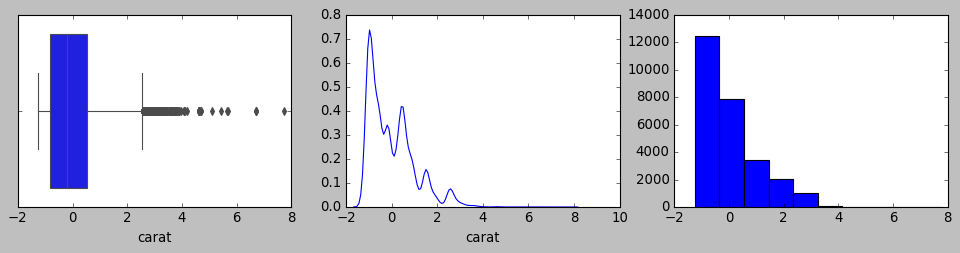

Column carat is not normally distributed

 2. Univariate analysis for cut 

Mean is 0.000000, Median is 0.081246, Mode(s) are 0.9796
Column cut does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


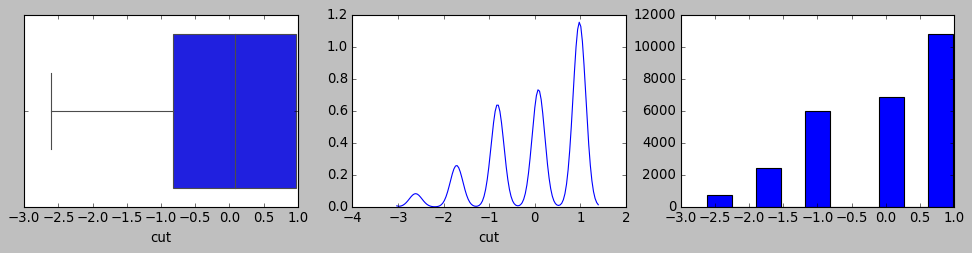

Column cut is not normally distributed

 3. Univariate analysis for color 

Mean is 0.000000, Median is -0.230890, Mode(s) are -0.2309
Column color does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


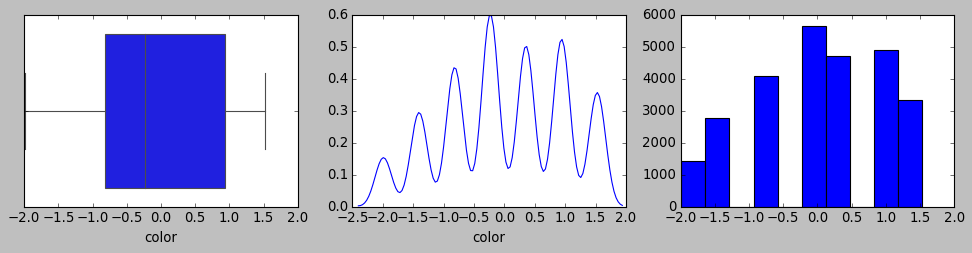

Column color is not normally distributed

 4. Univariate analysis for clarity 

Mean is 0.000000, Median is -0.032241, Mode(s) are -0.6394
Column clarity does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


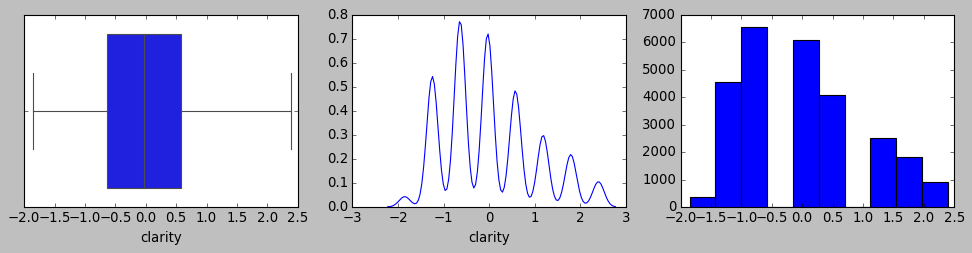

Column clarity is not normally distributed

 5. Univariate analysis for depth 

Mean is 0.000000, Median is 0.036839, Mode(s) are 0.0368
Column depth has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


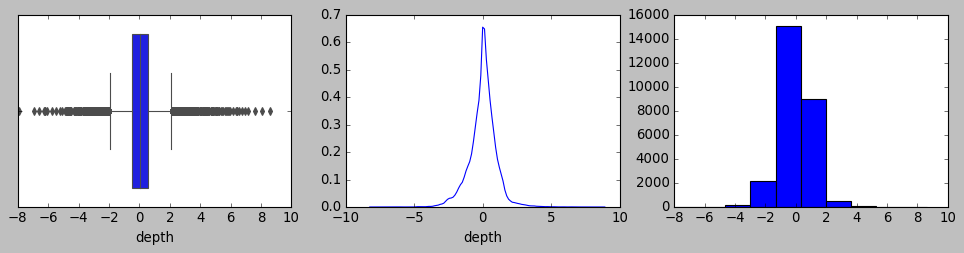

Column depth is not normally distributed

 6. Univariate analysis for table 

Mean is -0.000000, Median is -0.204334, Mode(s) are -0.6524
Column table has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


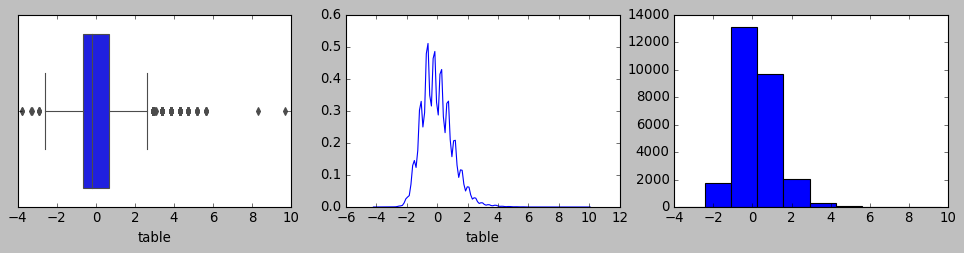

Column table is not normally distributed

 7. Univariate analysis for x 

Mean is 0.000000, Median is -0.035316, Mode(s) are -1.1962
Column x has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


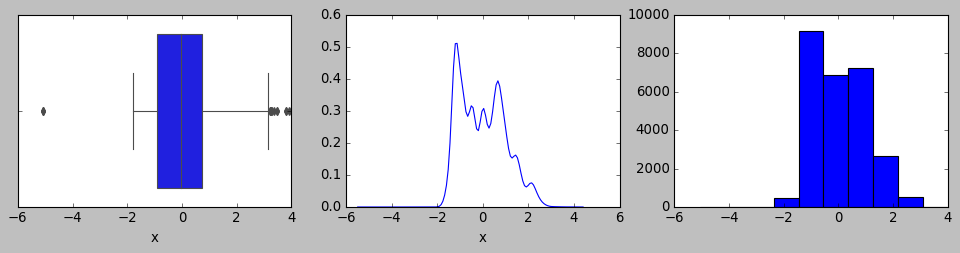

Column x is not normally distributed

 8. Univariate analysis for y 

Mean is -0.000000, Median is -0.020213, Mode(s) are -1.1866
Column y has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


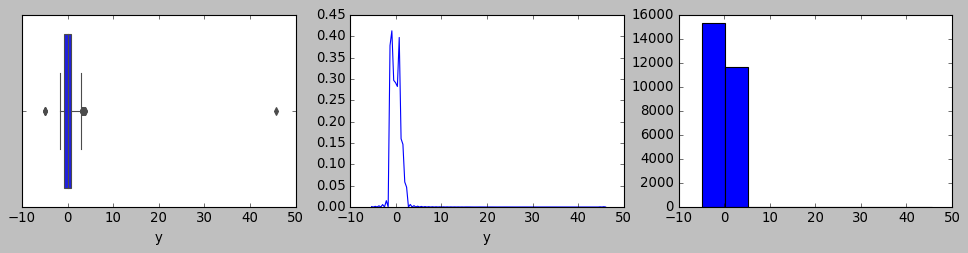

Column y is not normally distributed

 9. Univariate analysis for z 

Mean is -0.000000, Median is -0.025058, Mode(s) are -1.1769
Column z has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


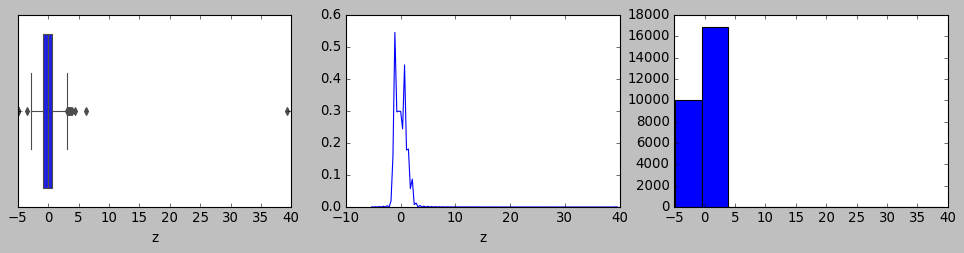

Column z is not normally distributed

 10. Univariate analysis for price 

Mean is -0.000000, Median is -0.388720, Mode(s) are -0.8437
Column price has outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


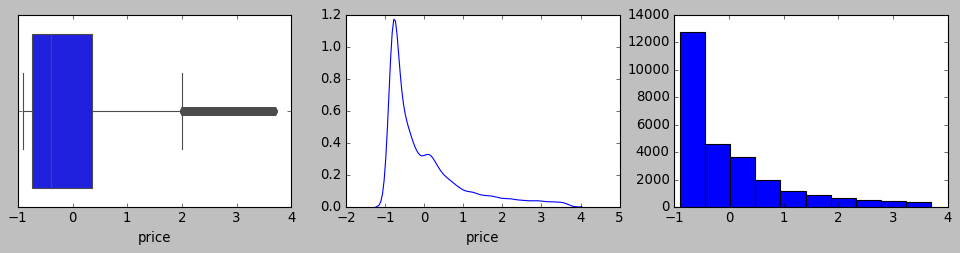

Column price is not normally distributed


In [110]:
univariate_analysis(df_cz_scaled,0)

In [55]:
df_cz_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [144]:
df_cz_treated = df_cz_scaled.copy()


# carat_IQR= df_cz_treated['carat'].quantile(0.75) -df_cz_treated['carat'].quantile(0.25) 
# whisker_left_carat=float(np.percentile(df_cz_treated['carat'],[25]))-(1.5*carat_IQR)
# df_cz_treated.iloc[df_cz_treated[df_cz_treated['carat']<whisker_left_carat].index,0]=whisker_left_carat
# print(whisker_left_carat)

carat_IQR= df_cz_treated['carat'].quantile(0.75) -df_cz_treated['carat'].quantile(0.25) 
whisker_right_carat=float(np.percentile(df_cz_treated['carat'],[75]))+(1.5*carat_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['carat']>whisker_right_carat].index,'carat']=whisker_right_carat
print(whisker_right_carat)

depth_IQR= df_cz_treated['depth'].quantile(0.75) -df_cz_treated['depth'].quantile(0.25)

whisker_left_depth=float(np.percentile(df_cz_treated['depth'],[25]))-(1.5*depth_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['depth']<whisker_left_depth].index,'depth']=whisker_left_depth
print(whisker_left_depth)

whisker_right_depth=float(np.percentile(df_cz_treated['depth'],[75]))+(1.5*depth_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['depth']>whisker_right_depth].index,'depth']=whisker_right_depth
print(whisker_right_depth)

table_IQR= df_cz_treated['table'].quantile(0.75) -df_cz_treated['table'].quantile(0.25)

whisker_left_table=float(np.percentile(df_cz_treated['table'],[25]))-(1.5*table_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['table']<whisker_left_table].index,'table']=whisker_left_table
print(whisker_left_table)

whisker_right_table=float(np.percentile(df_cz_treated['table'],[75]))+(1.5*table_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['table']>whisker_right_table].index,'table']=whisker_right_table
print(whisker_right_table)

x_IQR= df_cz_treated['x'].quantile(0.75) -df_cz_treated['x'].quantile(0.25)

whisker_left_x=float(np.percentile(df_cz_treated['x'],[25]))-(1.5*x_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['x']<whisker_left_x].index,'x']=whisker_left_x
print(whisker_left_x)

whisker_right_x=float(np.percentile(df_cz_treated['x'],[75]))+(1.5*x_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['x']>whisker_right_x].index,'x']=whisker_right_x
print(whisker_right_x)

y_IQR= df_cz_treated['y'].quantile(0.75) -df_cz_treated['y'].quantile(0.25)

whisker_left_y=float(np.percentile(df_cz_treated['y'],[25]))-(1.5*y_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['y']<whisker_left_y].index,'y']=whisker_left_table
print(whisker_left_y)

whisker_right_y=float(np.percentile(df_cz_treated['y'],[75]))+(1.5*y_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['y']>whisker_right_y].index,'y']=whisker_right_y
print(whisker_right_y)

z_IQR= df_cz_treated['z'].quantile(0.75) -df_cz_treated['z'].quantile(0.25)

whisker_left_z=float(np.percentile(df_cz_treated['z'],[25]))-(1.5*z_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['z']<whisker_left_z].index,'z']=whisker_left_z
print(whisker_left_z)

whisker_right_z=float(np.percentile(df_cz_treated['z'],[75]))+(1.5*z_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['z']>whisker_right_z].index,'z']=whisker_right_z
print(whisker_right_z)


price_IQR= df_cz_treated['price'].quantile(0.75) -df_cz_treated['price'].quantile(0.25)

whisker_left_price=float(np.percentile(df_cz_treated['price'],[25]))-(1.5*price_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['price']<whisker_left_price].index,'price']=whisker_left_price
print(whisker_left_price)

whisker_right_price=float(np.percentile(df_cz_treated['price'],[75]))+(1.5*price_IQR)
df_cz_treated.loc[df_cz_treated[df_cz_treated['price']>whisker_right_price].index,'price']=whisker_right_price
print(whisker_right_price)

2.5675749741502534
-1.9972530704871247
2.070930974182733
-2.6684627580685745
2.7078174401290203
-3.349462785334703
3.1724952585716313
-3.2319491836853524
3.0457305511012747
-3.2584288227190217
3.0695409910165172
-2.3894459142108544
1.9983606118389319



 1. Univariate analysis for carat 

Mean is -0.010011, Median is -0.205920, Mode(s) are -1.0432
Column carat does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


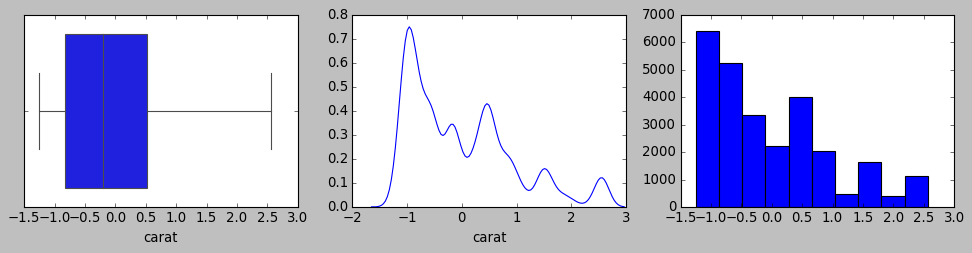

Column carat is not normally distributed

 2. Univariate analysis for cut 

Mean is 0.000000, Median is 0.081246, Mode(s) are 0.9796
Column cut does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


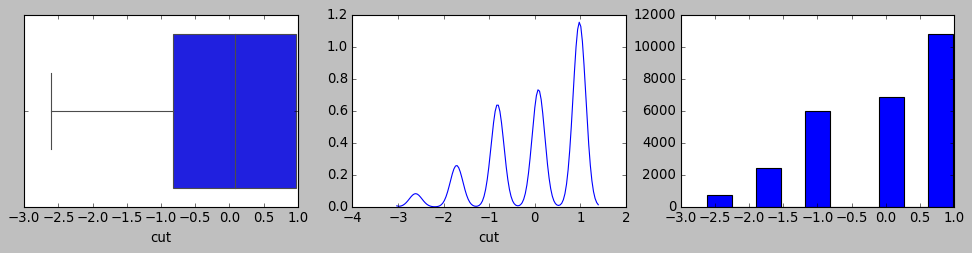

Column cut is not normally distributed

 3. Univariate analysis for color 

Mean is 0.000000, Median is -0.230890, Mode(s) are -0.2309
Column color does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


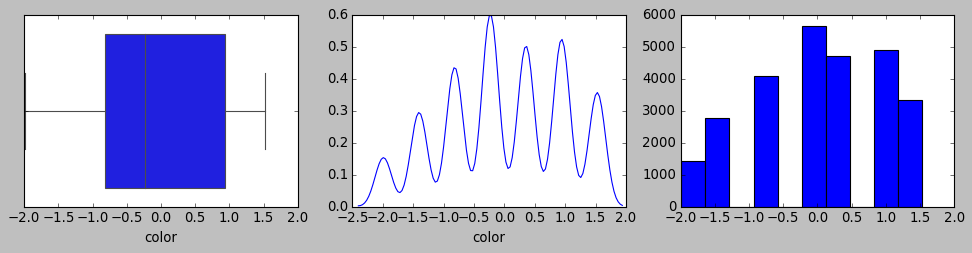

Column color is not normally distributed

 4. Univariate analysis for clarity 

Mean is 0.000000, Median is -0.032241, Mode(s) are -0.6394
Column clarity does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


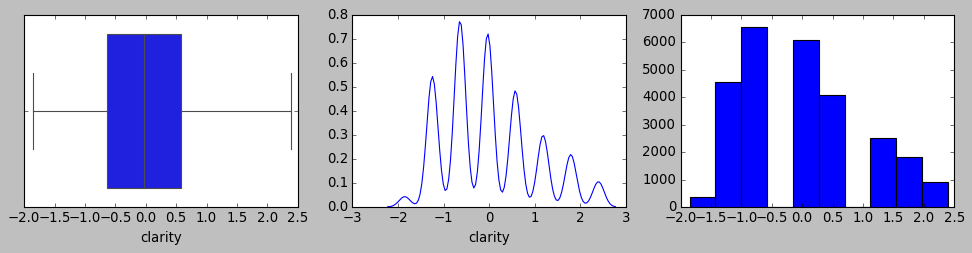

Column clarity is not normally distributed

 5. Univariate analysis for depth 

Mean is 0.002861, Median is 0.036839, Mode(s) are 0.0368
Column depth does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


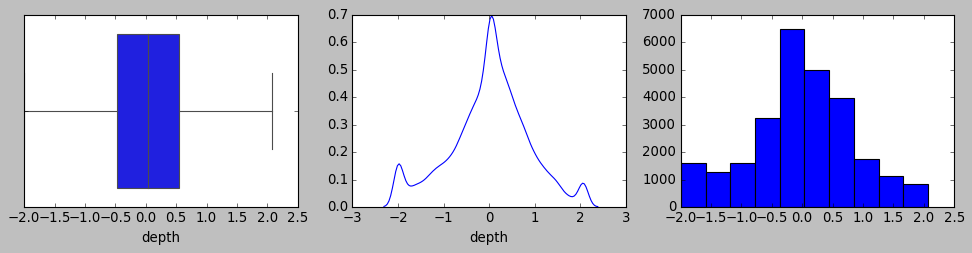

Column depth is not normally distributed

 6. Univariate analysis for table 

Mean is -0.009131, Median is -0.204334, Mode(s) are -0.6524
Column table does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


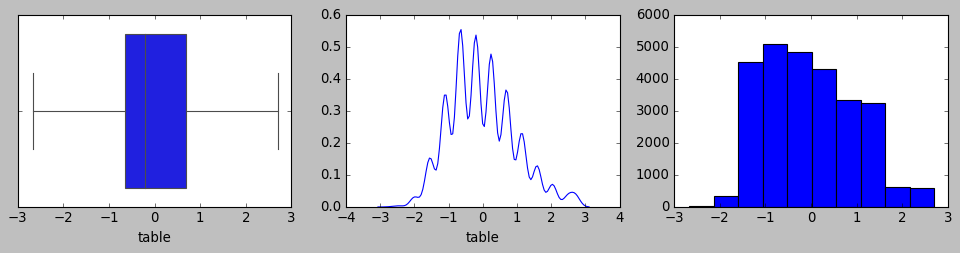

Column table is not normally distributed

 7. Univariate analysis for x 

Mean is 0.000044, Median is -0.035316, Mode(s) are -1.1962
Column x does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


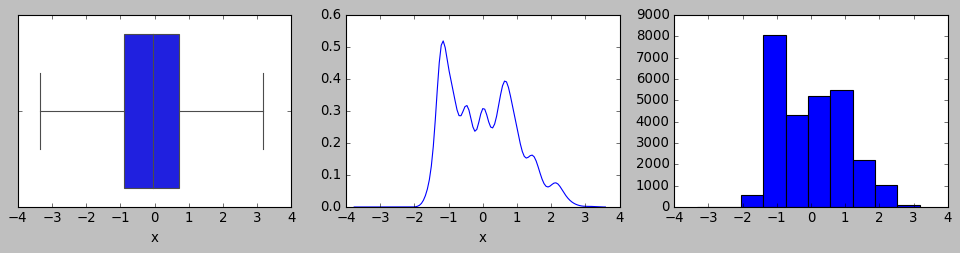

Column x is not normally distributed

 8. Univariate analysis for y 

Mean is -0.001456, Median is -0.020213, Mode(s) are -1.1866
Column y does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


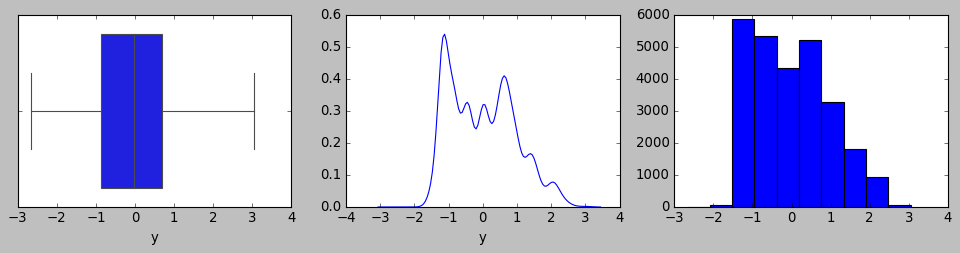

Column y is not normally distributed

 9. Univariate analysis for z 

Mean is -0.001105, Median is -0.025058, Mode(s) are -1.1769
Column z does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


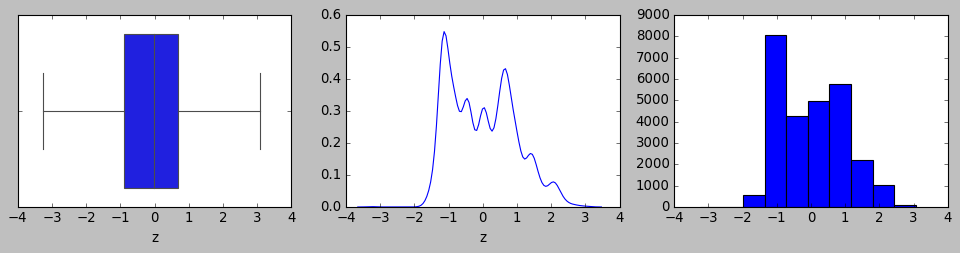

Column z is not normally distributed

 10. Univariate analysis for price 

Mean is -0.050091, Median is -0.388720, Mode(s) are 1.9984
Column price does not have outliers


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


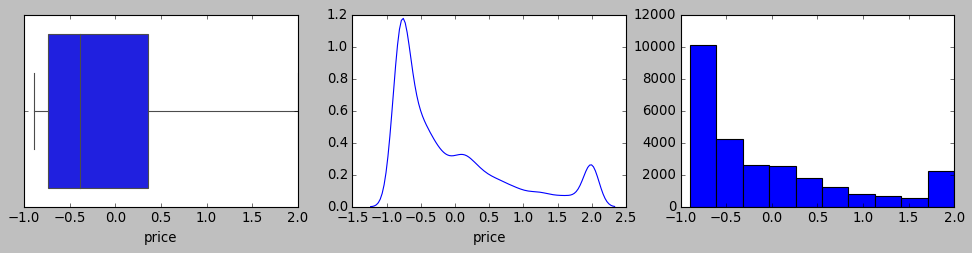

Column price is not normally distributed


In [145]:
univariate_analysis(df_cz_treated)

<Figure size 400x400 with 0 Axes>

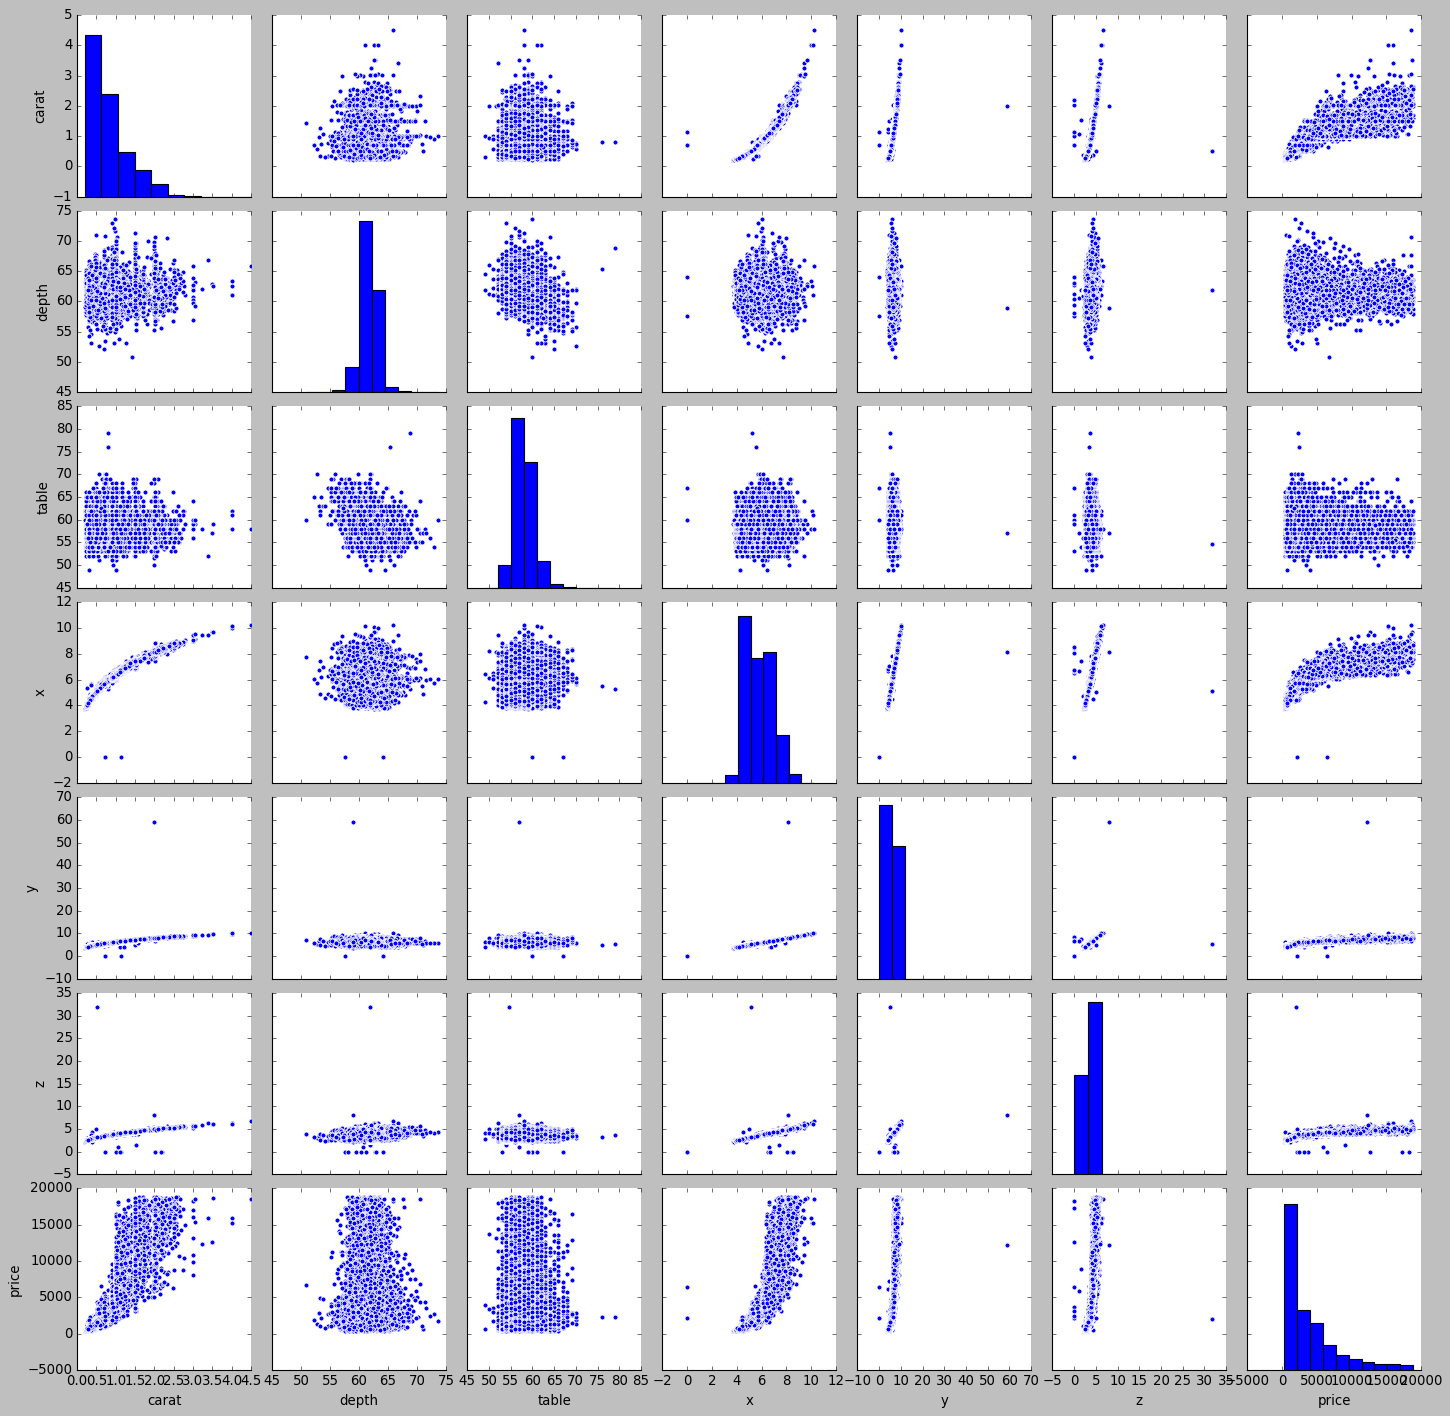

In [149]:
plt.figure(figsize=(5,5))
sns.pairplot(df_cz)

<AxesSubplot:>

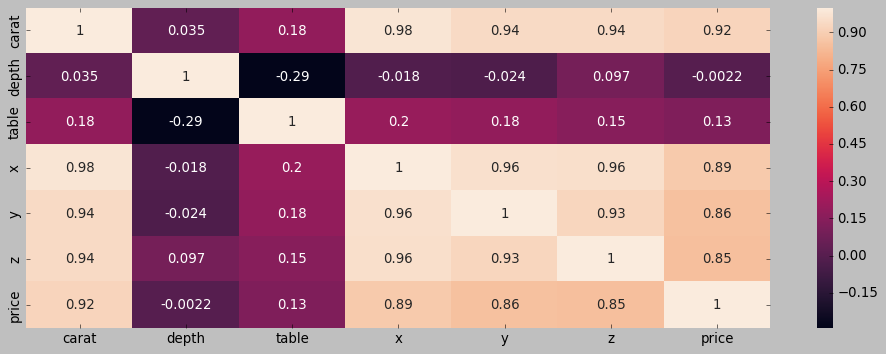

In [150]:
plt.figure(figsize=(15,5))
sns.heatmap(df_cz.corr(), annot=True)

<Figure size 400x400 with 0 Axes>

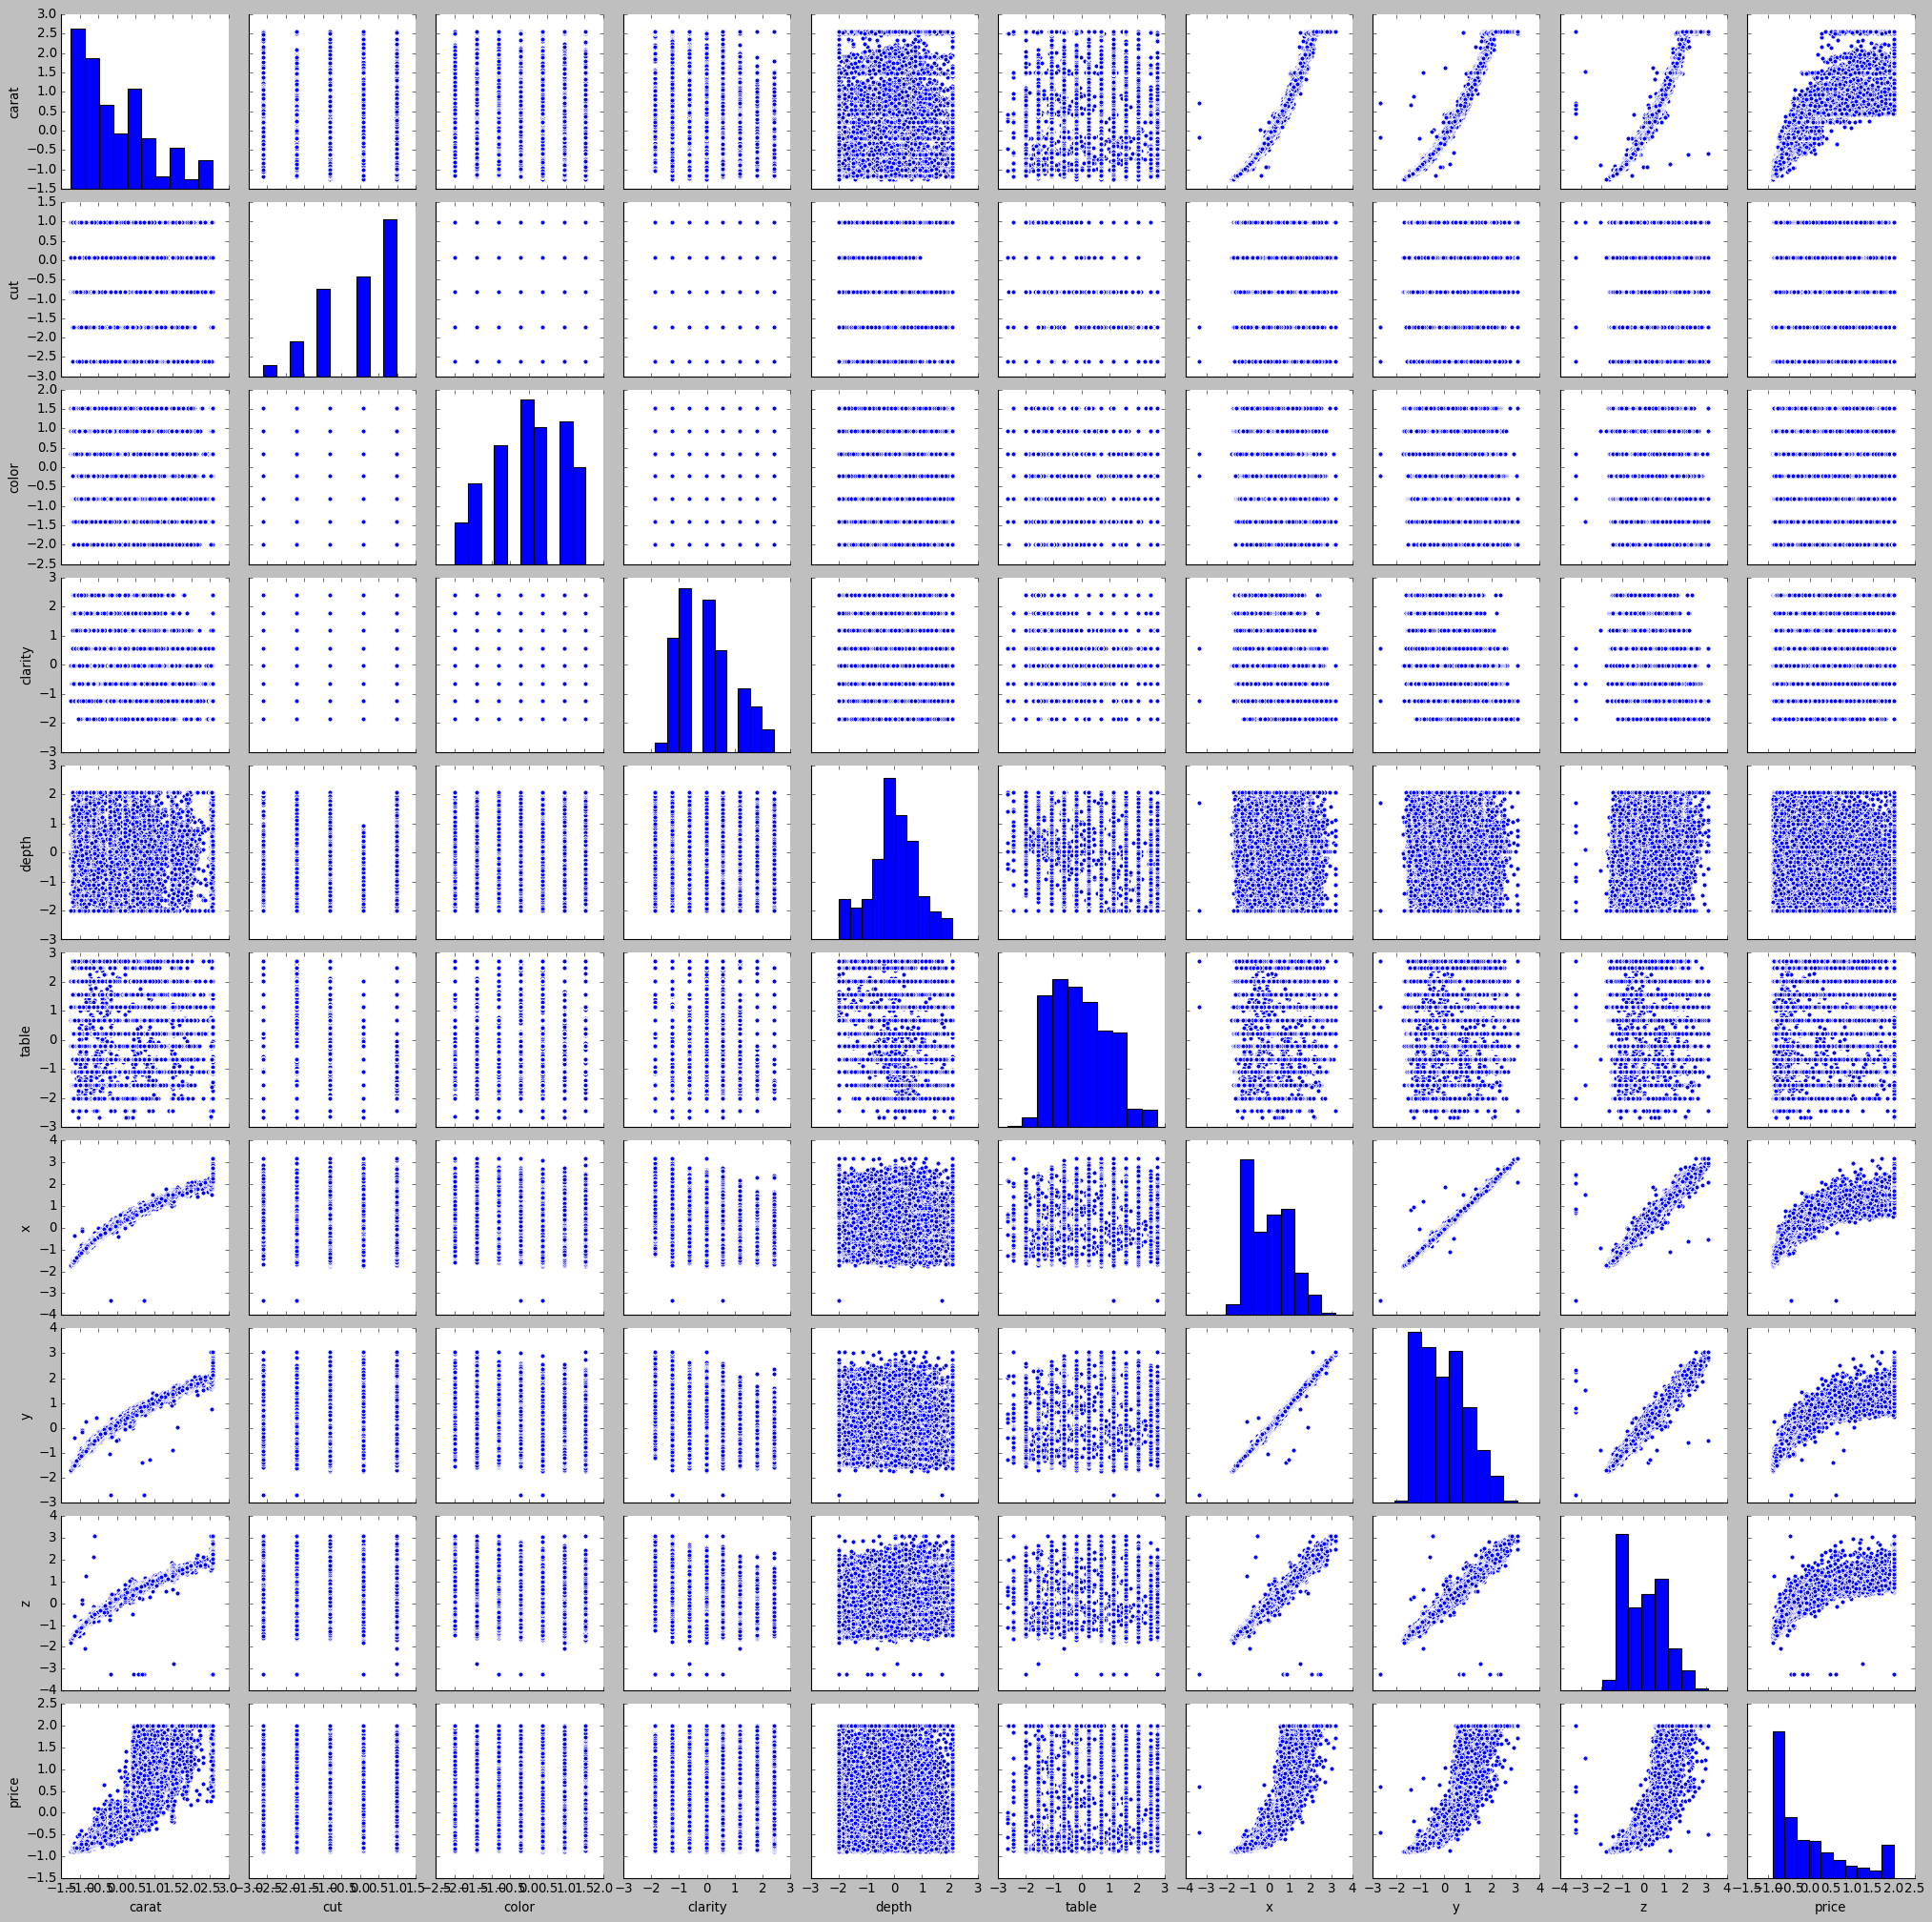

In [146]:
plt.figure(figsize=(5,5))
sns.pairplot(df_cz_treated)

<AxesSubplot:>

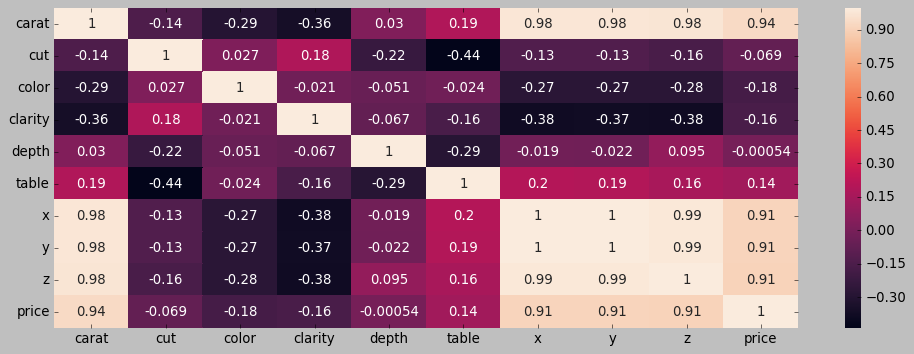

In [151]:
plt.figure(figsize=(15,5))
sns.heatmap(df_cz_treated.corr(), annot=True)

In [168]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df_cz_treated.drop('price', axis=1) 

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df_cz_treated[['price']]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Coefficients for each of the independent attributes in the ascending order

ctr=0
for columns in X_train.columns[np.argsort(regression_model.coef_[0])]:
    print("The coefficient for {} is {}".format(columns, regression_model.coef_[0][np.argsort(regression_model.coef_[0])[ctr]]))
    ctr=ctr+1


The coefficient for x is -0.4008495340449939
The coefficient for z is -0.04195839352241355
The coefficient for table is -0.008642549562739067
The coefficient for depth is -0.0036363411612809933
The coefficient for cut is 0.031057027924175366
The coefficient for color is 0.11606260341852531
The coefficient for clarity is 0.17718003260757578
The coefficient for y is 0.35221836662829
The coefficient for carat is 1.0464838449573717


In [192]:
# intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.03703053661524415


In [193]:
regression_model.score(X_train, y_train)

0.9316468798709168

In [202]:
# Model score - R2 or coeff of determinant

regression_model.score(X_test, y_test)
# df_cz.info()

0.9297632337879915

In [208]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

0.22738245740063534

In [229]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()
# lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+table+x+y', data = data_train).fit()
lm1.params.sort_values(ascending=False) 

carat        1.036077
y            0.351367
clarity      0.177818
color        0.116292
cut          0.034307
table       -0.004653
Intercept   -0.037056
x           -0.430276
dtype: float64

In [232]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.669e+04
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:30:55   Log-Likelihood:                 1281.7
No. Observations:               18876   AIC:                            -2547.
Df Residuals:                   18868   BIC:                            -2485.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0371      0.002    -22.468      0.0

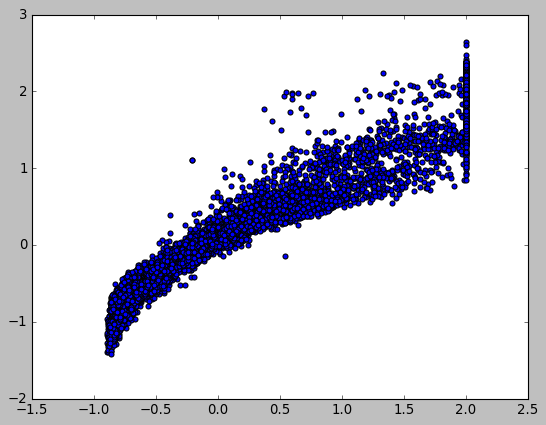

In [210]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [224]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

i=0
for column in X.columns[np.argsort(vif)]:
    print('VIF for {} is {}'.format(column,vif[np.argsort(vif)[i]]))
    i=i+1



VIF for color is 1.1198869275579821
VIF for clarity is 1.2393694612256239
VIF for cut is 1.5038358545061628
VIF for table is 1.6077150977960508
VIF for depth is 2.6906893423839855
VIF for carat is 31.31858309755136
VIF for z is 101.34130541954183
VIF for y is 364.70378759481844
VIF for x is 379.2132478903028
